In [63]:
# Importing all the libraries needed
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import pandas as pd
import os, requests, cv2, random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from sklearn.metrics import confusion_matrix,classification_report

## 1. Loading data and preprocessing it

In [64]:
# checking directory
import os
print(os.getcwd())

c:\Users\Javi\OneDrive - University of California Merced\Desktop\CSE 120\Anomaly Detection\Leaf-Classification\data\tomato


In [65]:
train_data_dir = 'newleafdatasetbgrem10k' #'data/tomato/____' only the dataset not complete path

# Check if the directory exists
if not os.path.exists(train_data_dir):
    print(f"The directory {train_data_dir} does not exist.")
else:
    print(f"Found directory {train_data_dir}. Proceeding with loading data...")
    # Proceed with your data loading and model training

Found directory newleafdatasetbgrem10k. Proceeding with loading data...


In [66]:
# loading the pictures of leaves

train_data_dir = './newleafdatasetbgrem10k/train'
test_data_dir = './newleafdatasetbgrem10k/test' #this folder will be used for evaluating model's perfomance
val_data_dir = './newleafdatasetbgrem10k/val'
# not val in test_data_dir

In [67]:
# for this challenge we are using ImageDataGenerator 

train_datagen = ImageDataGenerator(rescale=1/255.0,
                               shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)# no need to specify the validation split inside this function, instead separately

val_datagen = ImageDataGenerator(rescale=1/255.0, 
                                 shear_range=0.2, 
                                 zoom_range=0.2, 
                                 horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255.0,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

In [68]:
train_gen = train_datagen.flow_from_directory(
                                train_data_dir,
                                target_size=(224, 224),
                                batch_size=32,
                                shuffle=True,
                                class_mode='categorical') # removed subset='training'

Found 7920 images belonging to 10 classes.


In [69]:
val_gen = val_datagen.flow_from_directory(
                                val_data_dir,
                                target_size=(224,224),
                                batch_size=32,
                                shuffle=True,
                                class_mode='categorical') # removed subset='validation'

Found 2200 images belonging to 10 classes.


In [70]:
test_gen = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        shuffle = False) #shuffle will not affect the accuracy of the model, but will affect the computation of some metrics that depend on the order of the samples

Found 880 images belonging to 10 classes.


## 1a. Building a CNN model with a learning rate of 0.0001

In [71]:
# CNN model layers

cnn = models.Sequential()

cnn.add(layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape = [224, 224,3])),
cnn.add(layers.MaxPooling2D(pool_size = (2, 2))),

cnn.add(layers.Conv2D(64, (3,3), activation='relu')),
cnn.add(layers. MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D(64, (3,3), activation='relu')),
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D(64, (3, 3), activation='relu')), 
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D(64, (3, 3), activation='relu')), 
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers.Conv2D(64, (3, 3), activation='relu')), 
cnn.add(layers.MaxPooling2D((2, 2))),

cnn.add(layers.Flatten()),

cnn.add(layers.Dense(64,activation='relu'))
#output layer
cnn.add(layers.Dense(10,activation='softmax'))

In [72]:
cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 26, 26, 64)       

In [73]:
opt = keras.optimizers.Adam(learning_rate=0.0005)

In [74]:
cnn.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

Before training the model, let's define an Early Stopping to avoid oferfitting.

In [75]:
es = EarlyStopping(monitor = 'val_accuracy', 
                   mode = 'max', 
                   patience = 20, 
                   verbose = 1, 
                   restore_best_weights = True)

In [76]:
history = cnn.fit(x = train_gen,
                    callbacks = [es], 
                    # steps_per_epoch = 7000/32,
                    epochs = 250,
                    # validation_steps = 3000/32,
                    validation_data = val_gen)  

Epoch 1/250
248/248 [==============================] - 73s 292ms/step - loss: 1.9700 - accuracy: 0.2514 - val_loss: 1.6365 - val_accuracy: 0.3950
Epoch 2/250
248/248 [==============================] - 71s 287ms/step - loss: 1.4273 - accuracy: 0.4843 - val_loss: 1.2684 - val_accuracy: 0.5336
Epoch 3/250
248/248 [==============================] - 71s 287ms/step - loss: 1.1491 - accuracy: 0.5902 - val_loss: 1.0694 - val_accuracy: 0.6005
Epoch 4/250
248/248 [==============================] - 71s 287ms/step - loss: 1.0361 - accuracy: 0.6352 - val_loss: 1.0243 - val_accuracy: 0.6255
Epoch 5/250
248/248 [==============================] - 71s 288ms/step - loss: 0.9178 - accuracy: 0.6736 - val_loss: 1.0147 - val_accuracy: 0.6255
Epoch 6/250
248/248 [==============================] - 71s 287ms/step - loss: 0.8190 - accuracy: 0.7112 - val_loss: 0.9130 - val_accuracy: 0.6868
Epoch 7/250
248/248 [==============================] - 71s 287ms/step - loss: 0.7426 - accuracy: 0.7423 - val_loss: 0.7592 -

In [77]:
scores = cnn.evaluate(test_gen)

28/28 [==============================] - 7s 264ms/step - loss: 0.3202 - accuracy: 0.9330


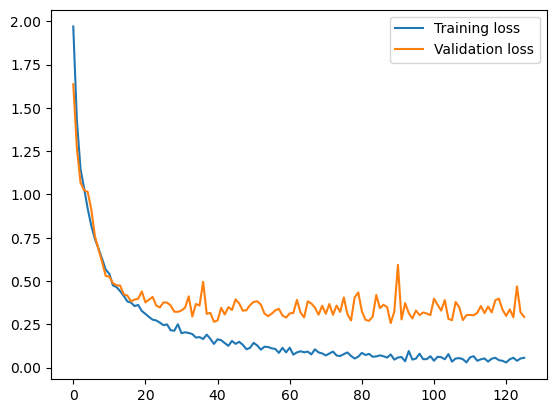

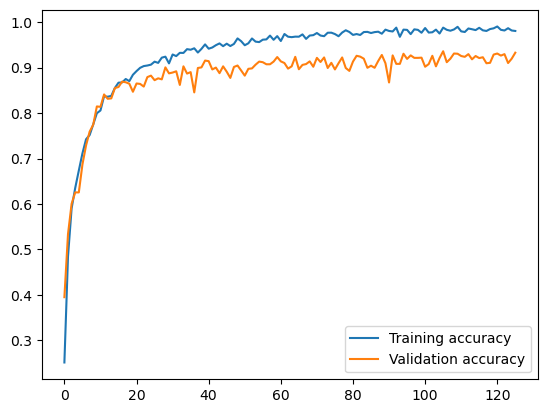

In [78]:
# plot the loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

# plot the accuracy
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

In [79]:
# don't forget to save your model for later
cnn.save('newLeaf_classification_training.h5')

c:\Users\Javi\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Making predictions, confusion matrix, metrics.

In [80]:
test_steps_per_epoch = np.math.ceil(test_gen.samples / test_gen.batch_size)

C:\Users\Javi\AppData\Local\Temp\ipykernel_5184\2245222372.py:1: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  test_steps_per_epoch = np.math.ceil(test_gen.samples / test_gen.batch_size)


In [81]:
# Predict classes
predictions = cnn.predict(test_gen, steps=test_steps_per_epoch)

28/28 [==============================] - 5s 172ms/step


In [82]:
predictions[1]

array([9.9995828e-01, 6.2482508e-09, 1.1374368e-14, 3.2050882e-06,
       3.8524442e-05, 5.0352288e-23, 5.8444414e-09, 6.2233621e-19,
       7.4555854e-33, 3.0736232e-29], dtype=float32)

In [83]:
predicted_classes = np.argmax(predictions,axis=1)

In [84]:
# Get ground-truth classes and class-labels
true_classes = test_gen.classes
class_labels = list(test_gen.class_indices.keys())

In [85]:
# Print confusion matrix
confusion_matrix = confusion_matrix(test_gen.classes, predicted_classes)
print(confusion_matrix)

[[79  1  1  2  3  1  0  1  0  0]
 [ 2 79  5  0  1  0  1  0  0  0]
 [ 0  2 82  1  0  1  1  1  0  0]
 [ 0  0  2 79  4  1  0  0  2  0]
 [ 1  1  4  1 80  0  1  0  0  0]
 [ 0  0  0  0  1 83  2  0  0  2]
 [ 1  5  0  0  2  3 77  0  0  0]
 [ 0  0  0  0  0  0  0 87  1  0]
 [ 0  0  0  0  1  0  0  0 87  0]
 [ 0  0  1  0  0  0  1  0  0 86]]


In [86]:
# To check F1 score, recall etc.
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.95      0.90      0.92        88
                        Tomato___Early_blight       0.90      0.90      0.90        88
                         Tomato___Late_blight       0.86      0.93      0.90        88
                           Tomato___Leaf_Mold       0.95      0.90      0.92        88
                  Tomato___Septoria_leaf_spot       0.87      0.91      0.89        88
Tomato___Spider_mites Two-spotted_spider_mite       0.93      0.94      0.94        88
                         Tomato___Target_Spot       0.93      0.88      0.90        88
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.98      0.99      0.98        88
                 Tomato___Tomato_mosaic_virus       0.97      0.99      0.98        88
                             Tomato___healthy       0.98      0.98      0.98        88

                                     accu